In [1]:
#https://drive.google.com/file/d/1giqBhW11LO4Th0wXxsl_pVGABtknmg1_/view?usp=sharing
! gdown --id 1giqBhW11LO4Th0wXxsl_pVGABtknmg1_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1giqBhW11LO4Th0wXxsl_pVGABtknmg1_
To: /content/olist.db
100% 139M/139M [00:00<00:00, 244MB/s]


In [2]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
con = sqlite3.connect("/content/olist.db")
cursor = con.cursor()

# Mendapatkan daftar nama tabel
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Menampilkan daftar nama tabel
for table in tables:
    print(table[0])

olist_order_customer_dataset
olist_order_dataset
olist_order_reviews_dataset
olist_order_payments_dataset
olist_order_items_dataset
olist_products_dataset
olist_sellers_dataset
olist_geolocation_dataset
product_category_name_translation


In [4]:
# Fungsi untuk mendapatkan jumlah data pada tabel
def get_data_count(table_name):
    query = f"SELECT COUNT(*) FROM {table_name}"
    cursor.execute(query)
    result = cursor.fetchone()
    count = result[0]
    return count

# Menampilkan jumlah data untuk setiap tabel
for table in tables:
    table_name = table[0]
    count = get_data_count(table_name)
    print(f"Table: {table_name}")
    print(f"Data Count: {count}")
    print()

Table: olist_order_customer_dataset
Data Count: 99441

Table: olist_order_dataset
Data Count: 99441

Table: olist_order_reviews_dataset
Data Count: 99224

Table: olist_order_payments_dataset
Data Count: 103886

Table: olist_order_items_dataset
Data Count: 112650

Table: olist_products_dataset
Data Count: 32951

Table: olist_sellers_dataset
Data Count: 3095

Table: olist_geolocation_dataset
Data Count: 1000163

Table: product_category_name_translation
Data Count: 71



In [5]:
# Menampilkan nama kolom dan tipe datanya untuk setiap tabel
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    print("=================================")

    # Mendapatkan daftar kolom dan tipe datanya
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()

    # Menampilkan nama kolom dan tipe datanya
    for column in columns:
        column_name = column[1]
        column_type = column[2]
        print(f"{column_name}: {column_type}")

    print()

Table: olist_order_customer_dataset
index: INTEGER
customer_id: TEXT
customer_unique_id: TEXT
customer_zip_code_prefix: INTEGER
customer_city: TEXT
customer_state: TEXT

Table: olist_order_dataset
index: INTEGER
order_id: TEXT
customer_id: TEXT
order_status: TEXT
order_purchase_timestamp: TEXT
order_approved_at: TEXT
order_delivered_carrier_date: TEXT
order_delivered_customer_date: TEXT
order_estimated_delivery_date: TEXT

Table: olist_order_reviews_dataset
index: INTEGER
review_id: TEXT
order_id: TEXT
review_score: INTEGER
review_comment_title: TEXT
review_comment_message: TEXT
review_creation_date: TEXT
review_answer_timestamp: TEXT

Table: olist_order_payments_dataset
index: INTEGER
order_id: TEXT
payment_sequential: INTEGER
payment_type: TEXT
payment_installments: INTEGER
payment_value: REAL

Table: olist_order_items_dataset
index: INTEGER
order_id: TEXT
order_item_id: INTEGER
product_id: TEXT
seller_id: TEXT
shipping_limit_date: TEXT
price: REAL
freight_value: REAL

Table: olist_p

In [6]:
def missing_value(table_name):
    # Mendapatkan data dari tabel ke dalam DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", con)

    print(f"Table: {table_name}")
    print("===============================================")

    # Identifikasi NaN (missing values)
    print("Missing Values:")
    print(df.isnull().sum())
    print()

for table in tables:
  table_name = table[0]
  missing_value(table_name)

Table: olist_order_customer_dataset
Missing Values:
index                       0
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Table: olist_order_dataset
Missing Values:
index                               0
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Table: olist_order_reviews_dataset
Missing Values:
index                          0
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Table: olist_order_payment

In [7]:
# Fungsi untuk melakukan identifikasi duplicate data pada tabel
def identify_duplicate_data(table_name, unique_cols):
    # Mendapatkan data dari tabel ke dalam DataFrame
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, con)

    print(f"Table: {table_name}")
    print("=================================")

    if len(unique_cols) > 0:
        if set(unique_cols).issubset(df.columns):
            # Identifikasi duplicate data berdasarkan kolom unik
            duplicate_rows = df[df.duplicated(subset=unique_cols, keep=False)]
            if not duplicate_rows.empty:
                print("Duplicate Data:")
                print(duplicate_rows)
                print()
            else:
                print("No Duplicate Data Found.")
                print()
        else:
            print("One or more unique columns not found in the DataFrame.")
            print()
    else:
        print("No unique columns specified for this table.")
        print()

# Melakukan identifikasi duplicate data pada setiap tabel
for table in tables:
    table_name = table[0]
    if table_name != 'sqlite_sequence':
        if table_name == 'olist_order_customer_dataset':
            unique_cols = ['customer_id']
        elif table_name == 'olist_orders_dataset':
            unique_cols = ['order_id']
        elif table_name == 'olist_order_reviews_dataset':
            unique_cols = ['review_id']
        elif table_name == 'olist_order_payments_dataset':
            unique_cols = ['order_id', 'payment_sequential']  # Update kolom unik
        elif table_name == 'olist_order_items_dataset':
            unique_cols = ['order_id', 'order_item_id']  # Update kolom unik
        elif table_name == 'olist_products_dataset':
            unique_cols = ['product_id']
        elif table_name == 'olist_sellers_dataset':
            unique_cols = ['seller_id']
        elif table_name == 'olist_geolocation_dataset':
            unique_cols = ['geolocation_zip_code_prefix']  # Update kolom unik
        else:
            unique_cols = []

        identify_duplicate_data(table_name, unique_cols)

Table: olist_order_customer_dataset
No Duplicate Data Found.

Table: olist_order_dataset
No unique columns specified for this table.

Table: olist_order_reviews_dataset
Duplicate Data:
       index                         review_id  \
200      200  28642ce6250b94cc72bc85960aec6c62   
344      344  a0a641414ff718ca079b3967ef5c2495   
346      346  f4d74b17cd63ee35efa82cd2567de911   
360      360  ecbaf1fce7d2c09bfab46f89065afeaf   
393      393  6b1de94de0f4bd84dfc4136818242faa   
...      ...                               ...   
99108  99108  2c6c08892b83ba4c1be33037c2842294   
99124  99124  6ec93e77f444e0b1703740a69122e35d   
99164  99164  2afe63a67dfd99b3038f568fb47ee761   
99167  99167  017808d29fd1f942d97e50184dfb4c13   
99178  99178  44d1e9165ec54b1d89d33594856af859   

                               order_id  review_score review_comment_title  \
200    e239d280236cdd3c40cb2c033f681d1c             5                 None   
344    169d7e0fd71d624d306f132acd791cbe             5     

##### Data Cleaning

In [8]:
# Menghapus baris dengan missing value pada kolom product_category_name
query = "DELETE FROM olist_products_dataset WHERE product_category_name IS NULL"
cursor.execute(query)

# Menyimpan perubahan
con.commit()

In [9]:
# Query SQL untuk mengambil data produk yang relevan
query = """
SELECT oi.price, op.product_weight_g, op.product_length_cm, op.product_height_cm, op.product_width_cm, op.product_photos_qty
FROM olist_order_items_dataset AS oi
JOIN olist_products_dataset AS op ON oi.product_id = op.product_id
"""

# Membaca data ke dalam DataFrame
df = pd.read_sql_query(query, con)

# Identifikasi outlier pada atribut harga produk
price_outliers = df[(np.abs(df['price'] - df['price'].mean()) > 3 * df['price'].std())]

# Identifikasi outlier pada atribut berat produk
weight_outliers = df[(np.abs(df['product_weight_g'] - df['product_weight_g'].mean()) > 3 * df['product_weight_g'].std())]

# Identifikasi outlier pada atribut dimensi produk
length_outliers = df[(np.abs(df['product_length_cm'] - df['product_length_cm'].mean()) > 3 * df['product_length_cm'].std())]
height_outliers = df[(np.abs(df['product_height_cm'] - df['product_height_cm'].mean()) > 3 * df['product_height_cm'].std())]
width_outliers = df[(np.abs(df['product_width_cm'] - df['product_width_cm'].mean()) > 3 * df['product_width_cm'].std())]

# Identifikasi outlier pada atribut jumlah foto produk
photo_outliers = df[(np.abs(df['product_photos_qty'] - df['product_photos_qty'].mean()) > 3 * df['product_photos_qty'].std())]

# Menampilkan hasil identifikasi outlier
print("Outliers pada atribut harga produk:")
print(price_outliers)
print()

print("Outliers pada atribut berat produk:")
print(weight_outliers)
print()

print("Outliers pada atribut dimensi produk (panjang):")
print(length_outliers)
print()

print("Outliers pada atribut dimensi produk (tinggi):")
print(height_outliers)
print()

print("Outliers pada atribut dimensi produk (lebar):")
print(width_outliers)
print()

print("Outliers pada atribut jumlah foto produk:")
print(photo_outliers)
print()

Outliers pada atribut harga produk:
          price  product_weight_g  product_length_cm  product_height_cm  \
7        810.00           13805.0               35.0               75.0   
39       809.10            3407.0               28.0               22.0   
317     1050.61           18800.0               40.0               30.0   
339      849.00            1833.0               21.0               19.0   
465      899.00           19500.0               25.0               60.0   
...         ...               ...                ...                ...   
110725   935.00            1200.0               28.0                5.0   
110743   699.00            4920.0               65.0               11.0   
110847   899.00            1925.0               30.0               32.0   
110954   765.00             250.0               20.0               10.0   
111029   736.00             400.0               19.0                9.0   

        product_width_cm  product_photos_qty  
7               

In [10]:
# Membuat koneksi ke database
con = sqlite3.connect("/content/olist.db")

# Query SQL untuk membaca data dari tabel product_category_name_translation
query = "SELECT * FROM product_category_name_translation"

# Membaca data ke dalam DataFrame
df_translation = pd.read_sql_query(query, con)

# Menampilkan DataFrame
print(df_translation)

    index          product_category_name product_category_name_english
0       0                   beleza_saude                 health_beauty
1       1         informatica_acessorios         computers_accessories
2       2                     automotivo                          auto
3       3                cama_mesa_banho                bed_bath_table
4       4               moveis_decoracao               furniture_decor
..    ...                            ...                           ...
66     66                         flores                       flowers
67     67             artes_e_artesanato         arts_and_craftmanship
68     68                fraldas_higiene           diapers_and_hygiene
69     69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70     70             seguros_e_servicos         security_and_services

[71 rows x 3 columns]


In [11]:
# Query SQL untuk menggabungkan tabel-tabel yang relevan
query = """
SELECT oi.order_id, oi.product_id, oi.price, oi.order_item_id, oi.seller_id,
       op.product_category_name, o.order_purchase_timestamp, o.order_status,
       r.review_score
FROM olist_order_items_dataset AS oi
JOIN olist_products_dataset AS op ON oi.product_id = op.product_id
JOIN olist_order_dataset AS o ON oi.order_id = o.order_id
JOIN olist_order_reviews_dataset AS r ON oi.order_id = r.order_id
"""

# Membaca data ke dalam DataFrame
df = pd.read_sql_query(query, con)

In [12]:
df.to_csv(f"processed.csv", index=False)

In [13]:
df.head()

,order_id,product_id,price,order_item_id,seller_id,product_category_name,order_purchase_timestamp,order_status,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1,48436dade18ac8b2bce089ec2a041202,cool_stuff,2017-09-13 08:59:02,delivered,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,1,dd7ddc04e1b6c2c614352b383efe2d36,pet_shop,2017-04-26 10:53:06,delivered,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,1,5b51032eddd242adc84c38acab88f23d,moveis_decoracao,2018-01-14 14:33:31,delivered,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1,9d7a1d34a5052409006425275ba1c2b4,perfumaria,2018-08-08 10:00:35,delivered,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,1,df560393f3a51e74553ab94004ba5c87,ferramentas_jardim,2017-02-04 13:57:51,delivered,5


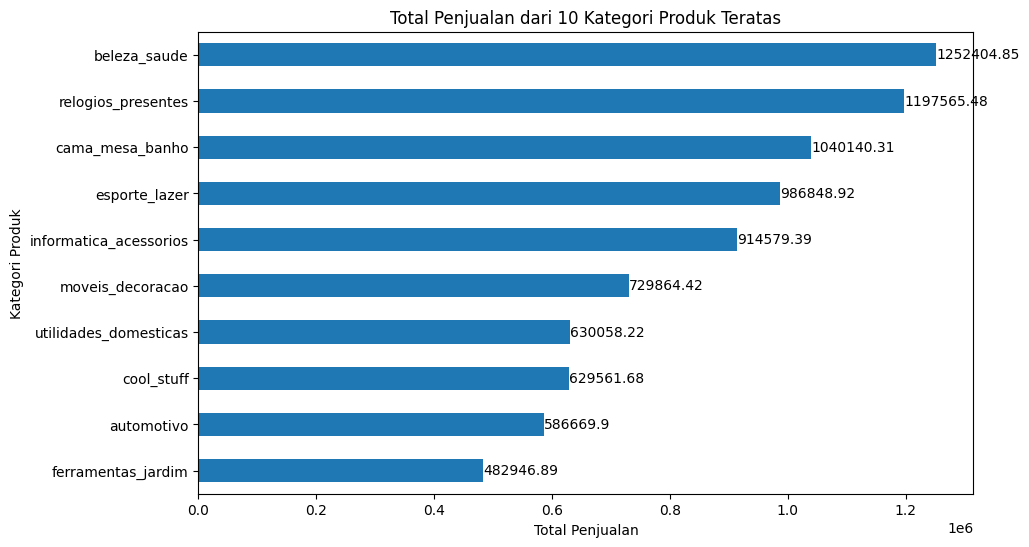

In [14]:
# Menghitung total penjualan berdasarkan kategori produk
category_sales = df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

# Mengambil 10 kategori produk teratas dengan urutan dari besar ke kecil
top_10_categories = category_sales.head(10)[::-1]

# Visualisasi menggunakan horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_categories.plot(kind='barh')
plt.title('Total Penjualan dari 10 Kategori Produk Teratas')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')

# Menambahkan nilai pada setiap bar
for i, v in enumerate(top_10_categories):
    plt.text(v, i, str(v), color='black', ha='left', va='center')
plt.show()

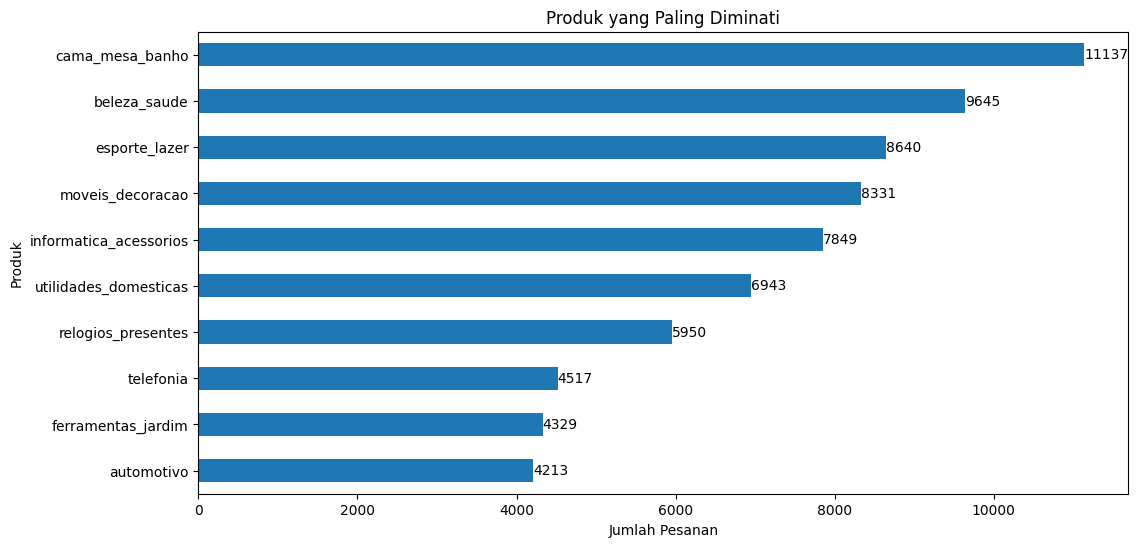

In [15]:
# Menghitung jumlah pesanan atau total penjualan untuk setiap produk
top_products = df['product_category_name'].value_counts().head(10)[::-1]

# Visualisasi menggunakan horizontal bar chart
plt.figure(figsize=(12, 6))
top_products.plot(kind='barh')
plt.title('Produk yang Paling Diminati')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Produk')

for i, v in enumerate(top_products):
    plt.text(v, i, str(v), color='black', ha='left', va='center')

plt.show()


<ipython-input-16-a457ef4d7b24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_products_data['order_purchase_timestamp'] = pd.to_datetime(top_10_products_data['order_purchase_timestamp'])


<Figure size 1200x600 with 0 Axes>

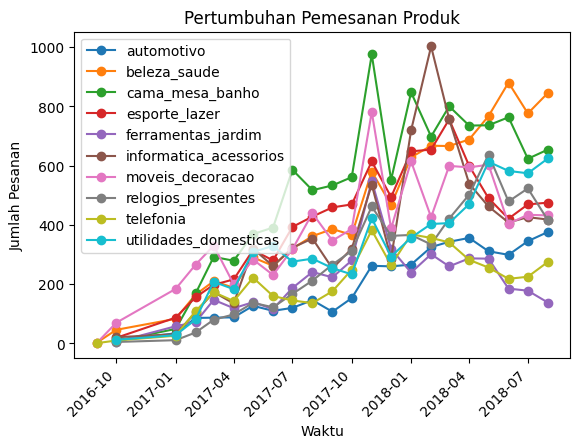

In [16]:
# Filter data untuk 10 produk yang paling diminati
top_10_products = df['product_category_name'].value_counts().head(10).index
top_10_products_data = df[df['product_category_name'].isin(top_10_products)]

# Mengubah tipe data kolom order_purchase_timestamp menjadi tipe datetime
top_10_products_data['order_purchase_timestamp'] = pd.to_datetime(top_10_products_data['order_purchase_timestamp'])

# Menghitung jumlah pesanan atau total penjualan per bulan untuk setiap produk
monthly_orders = top_10_products_data.groupby(['product_category_name', pd.Grouper(key='order_purchase_timestamp', freq='M')])['order_id'].count().reset_index()

# Mengubah format kategori menjadi "Tahun-Bulan"
monthly_orders['order_purchase_month'] = monthly_orders['order_purchase_timestamp'].dt.strftime('%Y-%b')

# Mengubah kolom order_purchase_month menjadi tipe data datetime
monthly_orders['order_purchase_month'] = pd.to_datetime(monthly_orders['order_purchase_month'], format='%Y-%b')

# Mengurutkan DataFrame berdasarkan kolom order_purchase_month
monthly_orders = monthly_orders.sort_values('order_purchase_month')

# Melakukan pivot table untuk mengubah data menjadi format yang sesuai untuk visualisasi
monthly_orders_pivot = monthly_orders.pivot(index='order_purchase_month', columns='product_category_name', values='order_id')

# Visualisasi menggunakan line chart
plt.figure(figsize=(12, 6))
monthly_orders_pivot.plot(kind='line', marker='o')
plt.title('Pertumbuhan Pemesanan Produk')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Pesanan')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()